In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Name_resolver
import tqdm as tq

In [2]:
def get_ncbi_clean_og2gene_for_species(
    species_1, og2genes_only_cococonet, ncbi_mapping
):

    species_1_name = Name_resolver.species_name_resolver(
        species_1, desired_type="common"
    )

    first_species_ortho_groups = og2genes_only_cococonet.loc[
        og2genes_only_cococonet["Species"] == species_1
    ]
    shared_orthogroups = first_species_ortho_groups["Orthogroup"].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(
        shared_orthogroups, desc="inner_loop", position=0, leave=False
    ):
        species_1_genes = (
            first_species_ortho_groups["Gene"]
            .loc[first_species_ortho_groups["Orthogroup"] == orthogroup]
            .to_list()
        )
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(
            columns=[f"{species_1_name} OrthoGene"], data=all_gene_combos
        )
        current_orthogroup_pd["Orthogroup"] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(
        right=ncbi_mapping[["Orthodb Gene", "Symbol"]],
        right_on="Orthodb Gene",
        left_on=f"{species_1_name} OrthoGene",
    )
    ncbi_added_once_clean = ncbi_added_once.drop(columns="Orthodb Gene")
    return ncbi_added_once_clean

In [3]:
og_groups = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv"
)
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,100007at3193,4558_0:003a4f,4558,3193,4558_0:003a4f,LOC110434333
1,100007at3193,4577_0:004254,4577,3193,4577_0:004254,LOC100276500
2,100007at3193,4577_0:004e43,4577,3193,4577_0:004e43,LOC100275058
3,100067at3193,4558_0:00439a,4558,3193,4558_0:00439a,LOC8071983
4,100085at3193,4558_0:002fd8,4558,3193,4558_0:002fd8,LOC8086335
...,...,...,...,...,...,...
502887,9969at3193,15368_0:000e9a,15368,3193,15368_0:000e9a,LOC100834561
502888,99917at3193,39947_0:006297,39947,3193,39947_0:006297,LOC107276177
502889,99917at3193,39947_0:00634f,39947,3193,39947_0:00634f,LOC9269479
502890,99917at3193,39947_0:006629,39947,3193,39947_0:006629,LOC9269626


In [4]:
ncbi_mapping = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv"
)

In [5]:
rice_og = get_ncbi_clean_og2gene_for_species(
    39947, og_groups, ncbi_mapping=ncbi_mapping
)

inner_loop:   0%|          | 0/15757 [00:00<?, ?it/s]

In [6]:
sorg_og = get_ncbi_clean_og2gene_for_species(
    4558, og_groups, ncbi_mapping=ncbi_mapping
)

inner_loop:   0%|          | 0/15624 [00:00<?, ?it/s]

In [7]:
list_of_non_single_gene_groups_rice = pd.Series(rice_og['Orthogroup'].value_counts().loc[rice_og['Orthogroup'].value_counts() >1])
list_of_non_single_gene_groups_sorg = pd.Series(sorg_og['Orthogroup'].value_counts().loc[sorg_og['Orthogroup'].value_counts() >1])
rice_og = rice_og.loc[rice_og['Orthogroup'].isin(list_of_non_single_gene_groups_rice.index)]
sorg_og = sorg_og.loc[sorg_og['Orthogroup'].isin(list_of_non_single_gene_groups_sorg.index)]

In [29]:
sorg_og

,sorghum OrthoGene,Orthogroup,Symbol
4,4558_0:000f6e,10051at3193,LOC8080530
5,4558_0:0014a0,10051at3193,LOC8084266
6,4558_0:002bd3,10051at3193,LOC8082194
7,4558_0:004624,10051at3193,LOC8074749
10,4558_0:00157c,100637at3193,LOC8059772
...,...,...,...
26200,4558_0:00133d,99586at3193,LOC8077449
26201,4558_0:001dcf,99586at3193,LOC8077446
26202,4558_0:0006b0,9959at3193,LOC8057378
26203,4558_0:002462,9959at3193,LOC8085434


In [30]:
rice_og

,rice_jp OrthoGene,Orthogroup,Symbol
0,39947_0:006251,100263at3193,Os11g0187500
1,39947_0:00643c,100263at3193,LOC107279546
2,39947_0:00677b,100263at3193,LOC9271426
4,39947_0:00057a,10051at3193,LOC107276016
5,39947_0:000a9c,10051at3193,Os01g0596100
...,...,...,...
26571,39947_0:000ecd,9959at3193,LOC4327414
26572,39947_0:00280c,9959at3193,LOC4334580
26573,39947_0:006297,99917at3193,Os11g0656400
26574,39947_0:00634f,99917at3193,Os11g0656000


In [8]:
high_heat_sorg_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/heat_stress_time_9/sorg_heat_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_sorg_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/heat_stress_time_9/sorg_heat_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_sorg_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/heat_stress_time_9/sorg_heat_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_sorg = pd.DataFrame(
    data=zip(
        high_heat_sorg_rep_1["Reads"],
        high_heat_sorg_rep_2["Reads"],
        high_heat_sorg_rep_3["Reads"],
    ),
    columns=["Tom Hot Rep 1", "Tom Hot Rep 2", "Tom Hot Rep 3"],
    index=high_heat_sorg_rep_1.index,
)

In [9]:
low_heat_sorg_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/control_time_9/sorg_control_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_sorg_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/control_time_9/sorg_control_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_sorg_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/control_time_9/sorg_control_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_sorg = pd.DataFrame(
    data=zip(
        low_heat_sorg_rep_1["Reads"],
        low_heat_sorg_rep_2["Reads"],
        low_heat_sorg_rep_3["Reads"],
    ),
    columns=["Tom Cold Rep 1", "Tom Cold Rep 2", "Tom Cold Rep 3"],
    index=low_heat_sorg_rep_1.index,
)

In [10]:
combined_sorg = pd.concat([high_heat_sorg, low_heat_sorg], axis=1)

In [11]:
dict_version = sorg_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
sorg_csv = combined_sorg.groupby(by = true_dict).mean()

In [12]:
sorg_csv

,Tom Hot Rep 1,Tom Hot Rep 2,Tom Hot Rep 3,Tom Cold Rep 1,Tom Cold Rep 2,Tom Cold Rep 3
10051at3193,12.250000,2.000000,12.00,10.00,4.500000,1.750000
100637at3193,0.000000,0.000000,0.00,0.00,0.000000,0.000000
1018at3193,0.000000,0.000000,0.00,0.00,0.000000,0.000000
102118at3193,0.000000,0.000000,0.00,0.00,0.000000,0.000000
10217at3193,93.333333,26.000000,62.00,123.00,49.666667,30.333333
...,...,...,...,...,...,...
9789at3193,804.500000,114.000000,193.50,310.00,111.500000,120.000000
9797at3193,3.833333,1.333333,2.50,7.50,1.166667,0.666667
9942at3193,405.000000,93.000000,183.75,320.75,128.500000,107.500000
99586at3193,0.000000,0.000000,0.00,0.00,0.000000,0.000000


In [13]:
sorg_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot",'Hot', "Cold", "Cold","Cold"],
    index=[
        "Tom Hot Rep 1",
        "Tom Hot Rep 2",
        "Tom Hot Rep 3",
        "Tom Cold Rep 1",
        "Tom Cold Rep 2",
        "Tom Cold Rep 3"
    ],
)

In [14]:
low_heat_rice_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Rice/control_1hr50min/rice_control_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_rice_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Rice/control_1hr50min/rice_control_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


low_heat_rice = pd.DataFrame(
    data=zip(
        low_heat_rice_1["Reads"],
        low_heat_rice_2["Reads"],
    ),
    columns=["Tom Cold Rep 1", "Tom Cold Rep 2"],
    index=low_heat_rice_1.index,
)


In [15]:
high_heat_rice_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Rice/heat_1hr50/rice_heat_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_rice_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Rice/heat_1hr50/rice_heat_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_rice = pd.DataFrame(
    data=zip(
        high_heat_rice_rep_1["Reads"],
        high_heat_rice_rep_2["Reads"],
    ),
    columns=["Tom Hot Rep 1", "Tom Hot Rep 2"],
    index=low_heat_rice_1.index,
)

In [16]:
combined_rice = pd.concat([high_heat_rice, low_heat_rice], axis=1)

In [17]:
dict_version = rice_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
combined_rice = combined_rice.groupby(by = true_dict).mean()

In [18]:
combined_rice

,Tom Hot Rep 1,Tom Hot Rep 2,Tom Cold Rep 1,Tom Cold Rep 2
100263at3193,0.000000,0.000000,0.000000,0.00
10051at3193,0.000000,0.000000,0.000000,0.00
10107at3193,0.000000,0.000000,0.000000,0.00
101302at3193,0.000000,0.000000,0.000000,0.00
1013at3193,14.000000,12.000000,5.000000,4.00
...,...,...,...,...
9822at3193,0.000000,0.000000,0.000000,0.00
98920at3193,0.000000,0.000000,2.000000,0.00
9942at3193,1651.750000,1982.250000,1651.000000,1949.75
9959at3193,1632.000000,1727.000000,2110.000000,2375.00


In [19]:
combined_rice = combined_rice.T
sorg_csv = sorg_csv.T

In [20]:
combined_rice = combined_rice.round(0)
sorg_csv = sorg_csv.round(0)

In [21]:
rice_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Cold", "Cold"],
    index=[
        "Tom Hot Rep 1",
        "Tom Hot Rep 2",
        "Tom Cold Rep 1",
        "Tom Cold Rep 2",
    ],
)

In [22]:
genes_to_keep_sorg = sorg_csv.columns[sorg_csv.sum(axis=0) >= 100]
sorg_csv = sorg_csv[genes_to_keep_sorg]
inference_sorg = DefaultInference(n_cpus=30)
dds_sorg = DeseqDataSet(
    counts=sorg_csv,
    metadata=sorg_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_sorg,
)
dds_sorg.deseq2()
stat_res_sorg = DeseqStats(dds_sorg, inference=inference_sorg)
stat_res_sorg.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.34 seconds.

Fitting dispersion trend curve...
... done in 0.13 seconds.

Fitting MAP dispersions...
... done in 0.34 seconds.

Fitting LFCs...
... done in 0.27 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
10217at3193   55.752821       -0.403027  0.320547 -1.257307  0.208642   
10512at3193   77.300695       -0.206302  0.352063 -0.585980  0.557889   
10648at3193  151.039266        0.237452  0.273536  0.868083  0.385349   
10653at3193   16.105691        0.890003  0.614130  1.449208  0.147280   
10772at3193  296.421692       -0.238758  0.335397 -0.711868  0.476547   
...                 ...             ...       ...       ...       ...   
9627at3193    23.123818       -0.321483  0.490838 -0.654968  0.512488   
9705at3193    66.096514       -0.723185  0.348548 -2.074852  0.038000   
9789at3193   216.661887        0.503621  0.415381  1.212432  0.225347   
9942at3193   178.148733       -0.056919  0.270011 -0.210804  0.833040   
9959at3193   209.512394       -0.193688  0.430787 -0.449616  0.652988   

                 padj  
10217at3193  0.744402  
10512at3193  0.93618

... done in 0.22 seconds.



In [23]:
genes_to_keep = combined_rice.columns[combined_rice.sum(axis=0) >= 100]
combined_rice = combined_rice[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds = DeseqDataSet(
    counts=combined_rice,
    metadata=rice_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.29 seconds.

Fitting dispersion trend curve...
... done in 0.11 seconds.

/home/passala/miniconda3/envs/Py_deseq/lib/python3.12/site-packages/pydeseq2/dds.py:425: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 0.29 seconds.

Fitting LFCs...
... done in 0.27 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10238at3193    144.205505        0.104380  0.270125  0.386414  6.991903e-01   
103112at3193   156.146318       -1.588859  0.280091 -5.672651  1.406043e-08   
104149at3193  1006.454646        0.205956  0.141432  1.456223  1.453310e-01   
104563at3193   276.946403       -1.711575  0.217150 -7.881988  3.222119e-15   
105793at3193   730.814044        0.306723  0.141413  2.168992  3.008326e-02   
...                   ...             ...       ...       ...           ...   
9789at3193     468.891041        0.671112  0.164060  4.090643  4.301781e-05   
9797at3193     164.587090        0.464618  0.269040  1.726949  8.417674e-02   
9814at3193     314.012595       -0.023118  0.193327 -0.119579  9.048167e-01   
9942at3193    1800.013453        0.065816  0.108496  0.606623  5.441014e-01   
9959at3193    1953.734207       -0.357984  0.116445 -3.074265  2.110217e-03 

... done in 0.24 seconds.



In [24]:
full_results_rice = stat_res.results_df
full_results_rice
full_sorg_results = stat_res_sorg.results_df

In [25]:
full_results_rice.to_csv('/data/passala/Module_paper_data/Sorghum_rice_heat_stress/rice_ortho_de_results_1_genefamily_removed.csv')
full_sorg_results.to_csv('/data/passala/Module_paper_data/Sorghum_rice_heat_stress/sorg_ortho_de_results_1_genefamily_removed.csv')


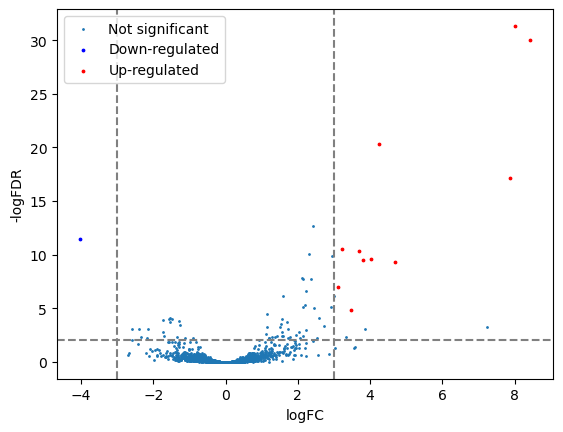

In [26]:
plt.scatter(
    x=full_sorg_results["log2FoldChange"],
    y=full_sorg_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down_sorg = full_sorg_results[
    (full_sorg_results["log2FoldChange"] <= -3)
    & (full_sorg_results["padj"] <= 0.0001)
]
up_sorg = full_sorg_results[
    (full_sorg_results["log2FoldChange"] >= 3) & (full_sorg_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down_sorg["log2FoldChange"],
    y=down_sorg["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up_sorg["log2FoldChange"],
    y=up_sorg["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [27]:
up_sorg

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
120174at3193,246.470617,7.863305,0.841431,9.345154,9.175622e-21,7.409315e-18
123349at3193,1661.860281,4.036521,0.564630,7.148966,8.743387e-13,2.567376e-10
126046at3193,475.181887,3.212472,0.428193,7.502389,6.266514e-14,2.891548e-11
130847at3193,172.048439,3.462718,0.654899,5.287407,1.240625e-07,1.602887e-05
137296at3193,1756.607466,8.437897,0.694278,12.153479,5.497549e-34,8.878542e-31
56406at3193,3000.380318,3.111517,0.501473,6.204750,5.478390e-10,1.040894e-07
583205at3193,573.392098,3.704560,0.498965,7.424488,1.132168e-13,4.571127e-11
867869at3193,722.855564,4.232777,0.418264,10.119865,4.510352e-24,4.856145e-21
870676at3193,567.332539,4.700913,0.667919,7.038146,1.948140e-12,4.840378e-10
878540at3193,2328.684990,8.008415,0.643424,12.446562,1.459996e-35,4.715786e-32


In [28]:
plt.scatter(
    x=full_results["log2FoldChange"],
    y=full_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down = full_results[
    (full_results["log2FoldChange"] <= -3) & (full_results["padj"] <= 0.0001)
]
up = full_results[
    (full_results["log2FoldChange"] >= 3) & (full_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down["log2FoldChange"],
    y=down["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up["log2FoldChange"],
    y=up["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

NameError: name 'full_results' is not defined

In [50]:
up

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10238at3193,18.554908,3.286850,0.700979,4.688945,2.746174e-06,7.748211e-06
10488at3193,52.714341,3.370811,0.479025,7.036822,1.966743e-12,1.061378e-11
110152at3193,24.742722,3.032530,0.558824,5.426629,5.742827e-08,1.987988e-07
11017at3193,51.827406,3.575398,0.513246,6.966247,3.255071e-12,1.718912e-11
110343at3193,304.120376,3.624832,0.235374,15.400305,1.628999e-53,9.112053e-52
...,...,...,...,...,...,...
889990at3193,147.367398,3.036290,0.266579,11.389854,4.697765e-30,8.209053e-29
895391at3193,123.323999,5.483741,0.498957,10.990408,4.250022e-28,6.617265e-27
933206at3193,83.063120,4.448669,0.483240,9.205922,3.387493e-20,3.388134e-19
938758at3193,310.969430,4.291252,0.858164,5.000503,5.718093e-07,1.757316e-06
